In [4]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [8]:
#prepare datasets
X_numpy,y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1)
n_samples,n_features = X.shape

In [16]:
input_size = n_features
output_size = n_features
model = nn.Linear(input_size,output_size)
criterion = nn.MSELoss()
lr = 0.01
epochs = 100
optimizer = torch.optim.SGD(model.parameters(),lr=lr)
for epoch in range(epochs):
    #forward pass and loss
    y_pred = model(X)
    loss = criterion(y_pred,y)
    #backward pass
    loss.backward()
    #update
    optimizer.step()
    optimizer.zero_grad()
    [w,b] = model.parameters()
    if (epoch+1) % 10 == 0:
        print(f"Epoch : {epoch+1} , weights = {w[0][0].item():.3f} , loss = {loss:.8f}")
        

Epoch : 10 , weights = 12.669 , loss = 4326.47558594
Epoch : 20 , weights = 22.938 , loss = 3228.40307617
Epoch : 30 , weights = 31.688 , loss = 2434.14599609
Epoch : 40 , weights = 39.145 , loss = 1859.01794434
Epoch : 50 , weights = 45.502 , loss = 1442.14172363
Epoch : 60 , weights = 50.922 , loss = 1139.68994141
Epoch : 70 , weights = 55.544 , loss = 920.06622314
Epoch : 80 , weights = 59.486 , loss = 760.46063232
Epoch : 90 , weights = 62.848 , loss = 644.38671875
Epoch : 100 , weights = 65.717 , loss = 559.91448975


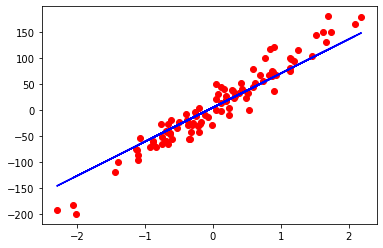

In [19]:
predicted = model(X).detach().numpy()
plt.plot(X_numpy,y_numpy,'ro')
plt.plot(X_numpy,predicted,'b')
plt.show()